# Neogen Survey Report
### Filip Jevtic, Brandon McIntyre, Ty Buckley, Yash Manne

## Abstract
**Purpose:**  
The CMSE 495: Experiental Learning in Data Science class was asked to complete a survey on how \*"close" they feel their Capstone Project is to other Capstone Projects. Each member of the class was instructed they could communicate with their fellow Capstone Project memebers, but must put independent answers.

\**"Close" is subjective, but is intended to capture similiarities between projects.*

**Data Collection:**
The data was collected into a csv with the rows being each individual and the columns representing all of the Capstone Projects. In the survery it was instructed that one must put 0 for the group that they belong to, and must rank the other groups 1-9.
This created a matrix were each row contained 0-9.

**Proposal:**
Below we are going to analyze the data contained from this survery. We hope to find some hidden realtionships inside of the data. We will look at the indvidual responses and responses of the Capstone Groups. Our assumption is that this dataset will be able to tell us which projects are similar. We do not assume that the realtionships will be undirected.

## Data input

Being that the data is of the form of CSV we will use Pandas to load the data into Python for analysis

In [27]:
import pandas as pd
import numpy as np

data = pd.read_csv("2022_Project_distance_Matrix.csv")
data

,ARFL,Argonne,Boeing,Delta Dental,Ford,Hope Village,Kellogg's,Neogen,Old Nation,Qside
0,7,4,9,8,3,0,6,2,5,1
1,0,1,3,2,4,8,6,5,7,9
2,3,2,1,6,0,8,5,4,7,9
3,8,7,3,9,4,5,0,6,1,2
4,0,2,1,8,7,3,9,6,4,5
5,3,2,0,6,9,7,8,4,1,5
6,3,4,2,9,8,6,0,5,7,1
7,1,2,5,3,0,6,9,7,8,4
8,6,1,0,5,2,9,4,3,7,8
9,3,1,2,6,0,8,9,4,5,7


## Data Cleaning

To ensure our analysis methods function properly, we need to analyze the data for any inconsistencies. We assume that each row will be a set of 0 through 9. This means that there will only be one of each number in the row. To check this we will perform a simple for loop to check for consistency

In [28]:
bad = []
for ind,row in data.iterrows():
    correct = set([0,1,2,3,4,5,6,7,8,9])
    test = set(row)
    if test != correct:
        bad.append(ind)
if len(bad) > 0:
    print("These are inconsistent rows")
    print(bad)
else:
    print("Data Clean")

Data Clean


The data is consistent, now we may move onto transforming the data for easier analysis. Since 0 in a column means that the indvidual belongs to that Capstone Group, we want to now make this explicit connection in a new row called `Team`

In [29]:
label = []
for ind,row in data.iterrows():
    for i, score in enumerate(row):
        if score == 0:
            label.append(data.columns[i])
data["Team"] = label
data

,ARFL,Argonne,Boeing,Delta Dental,Ford,Hope Village,Kellogg's,Neogen,Old Nation,Qside,Team
0,7,4,9,8,3,0,6,2,5,1,Hope Village
1,0,1,3,2,4,8,6,5,7,9,ARFL
2,3,2,1,6,0,8,5,4,7,9,Ford
3,8,7,3,9,4,5,0,6,1,2,Kellogg's
4,0,2,1,8,7,3,9,6,4,5,ARFL
5,3,2,0,6,9,7,8,4,1,5,Boeing
6,3,4,2,9,8,6,0,5,7,1,Kellogg's
7,1,2,5,3,0,6,9,7,8,4,Ford
8,6,1,0,5,2,9,4,3,7,8,Boeing
9,3,1,2,6,0,8,9,4,5,7,Ford


## Data Modeling

### Average Score per Team

We want to see the average score per team. This will allow us to see how like two given teams rated each other.

In [30]:
avg_team = data.groupby(["Team"]).mean()
avg_team

,ARFL,Argonne,Boeing,Delta Dental,Ford,Hope Village,Kellogg's,Neogen,Old Nation,Qside
Team,,,,,,,,,,
ARFL,0.000000,3.000000,3.000000,5.200000,4.000000,6.200000,6.600000,4.000000,5.600000,7.400000
Argonne,2.666667,0.000000,1.666667,3.333333,6.666667,5.333333,8.000000,6.000000,5.000000,6.333333
Boeing,3.200000,2.600000,0.000000,6.200000,4.600000,8.000000,5.600000,2.600000,5.800000,6.400000
Delta Dental,1.666667,7.333333,6.000000,0.000000,6.666667,5.333333,7.333333,4.000000,3.000000,3.666667
Ford,2.500000,2.500000,2.833333,5.666667,0.000000,7.666667,6.166667,3.833333,6.833333,7.000000
Hope Village,6.200000,5.400000,7.200000,6.400000,7.200000,0.000000,4.600000,4.400000,2.000000,1.600000
Kellogg's,4.333333,5.666667,4.333333,8.333333,7.000000,5.333333,0.000000,4.666667,4.000000,1.333333
Neogen,3.666667,4.000000,3.333333,7.000000,5.666667,5.333333,7.333333,0.000000,3.666667,5.000000
Old Nation,6.000000,5.250000,7.500000,6.250000,6.250000,1.250000,7.500000,3.250000,0.000000,1.750000


### Difference between Average Score

Buliding off of the average score for each group, we can also analze the difference in rating between groups.

In [31]:
dif_avg_team = np.abs(avg_team - avg_team.T)
dif_avg_team

,ARFL,Argonne,Boeing,Delta Dental,Ford,Hope Village,Kellogg's,Neogen,Old Nation,Qside
Team,,,,,,,,,,
ARFL,0.000000,0.333333,0.200000,3.533333,1.500000,0.000000,2.266667,0.333333,0.400000,3.900000
Argonne,0.333333,0.000000,0.933333,4.000000,4.166667,0.066667,2.333333,2.000000,0.250000,2.833333
Boeing,0.200000,0.933333,0.000000,0.200000,1.766667,0.800000,1.266667,0.733333,1.700000,0.400000
Delta Dental,3.533333,4.000000,0.200000,0.000000,1.000000,1.066667,1.000000,3.000000,3.250000,3.333333
Ford,1.500000,4.166667,1.766667,1.000000,0.000000,0.466667,0.833333,1.833333,0.583333,1.000000
Hope Village,0.000000,0.066667,0.800000,1.066667,0.466667,0.000000,0.733333,0.933333,0.750000,0.100000
Kellogg's,2.266667,2.333333,1.266667,1.000000,0.833333,0.733333,0.000000,2.666667,3.500000,4.666667
Neogen,0.333333,2.000000,0.733333,3.000000,1.833333,0.933333,2.666667,0.000000,0.416667,3.000000
Old Nation,0.400000,0.250000,1.700000,3.250000,0.583333,0.750000,3.500000,0.416667,0.000000,0.250000


### Indiviudal Scores Compared

We want to see how individual scores compare to each other. For this we will perform a PCA dimensionality reduction on the data.

In [39]:
from sklearn.decomposition import PCA

only_data = data.iloc[:,:-1].to_numpy()
pca = PCA(n_components=2)
pca_fit = pca.fit_transform(only_data)
print(pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1])

0.5921518521219942


As we can see, 2 dimensions gets 59% of the differences

## Data Visualization


### Average Team Comparison

We can use heatmap to see realtionships between the teams

In [36]:
# Heatmap here
import seaborn as sns
import matplotlib.pyplot as plt

We can also view the same thing with hierachical comparsion

In [34]:
# Other plot here

### Difference Average Team Comparison

We can use a heatmap to also view this difference. This shows how far off the teams were in grading thier likeness.

In [35]:
# Heatmap

### PCA of Indiviudal Scores

The following is a 2D plot of the PCA. Each color represnents different Capstone Groups

Text(0.5, 1.0, '')

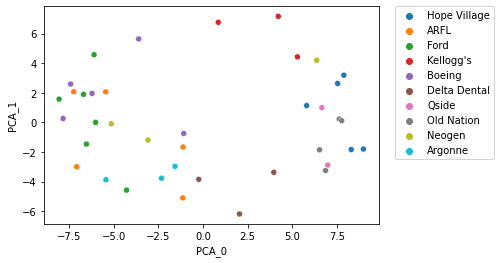

In [38]:
sns.scatterplot(x = pca_fit[:,0], y = pca_fit[:,1], hue = data["Team"])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.xlabel('PCA_0')
plt.ylabel('PCA_1')
plt.title('')

## Conclusion

This should be similar to the abstract but with more details. What can you conclude about your project from this data?